## Importing the necessary libraries for the project

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [2]:
file_name = 'AusApparalSales4thQrt2020.csv'
data = pd.read_csv(file_name)

## 1. Data Wrangling

### Ensuring there are no NA's

In [3]:
nans_per_column = data.isna().sum()
print(f"Number of NaNs in each column:\n{nans_per_column}")

Number of NaNs in each column:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [4]:
if(sum(nans_per_column)==0):
    print("No Nulls in the dataset")
else:
    print("Nulls are present")

No Nulls in the dataset


In [28]:
data.isnull().sum()

Date          0
Time          0
State         0
Group         0
Unit          0
Sales         0
Unit_norm     0
Sales_norm    0
dtype: int64

In [34]:
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data['Sales'][(data['Sales'] < lower_bound) | (data['Sales'] > upper_bound)]
print("Outliers using IQR:", outliers)

Outliers using IQR: 5082    157500
5083    155000
5161    140000
5162    147500
5169    160000
         ...  
7432    162500
7433    135000
7437    135000
7515    162500
7519    155000
Name: Sales, Length: 123, dtype: int64


#### b.	Based on your knowledge of data analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them).


#### Since there are no nulls there is no further action thats needed in terms of null value handling

##### c.	Choose a suitable data wrangling technique—either data standardization or normalization. Execute the preferred normalization method and present the resulting data. (Normalization is the preferred approach for this problem.)

In [5]:
print(data.head())

         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500


In [6]:
## Min max Normalization is done for both the Units and Sales

data['Unit_norm'] = (data['Unit'] - data['Unit'].min()) / (data['Unit'].max() - data['Unit'].min())
data['Sales_norm'] = (data['Sales'] - data['Sales'].min()) / (data['Sales'].max() - data['Sales'].min())

In [7]:
print(data.head())

         Date        Time State     Group  Unit  Sales  Unit_norm  Sales_norm
0  1-Oct-2020     Morning    WA      Kids     8  20000   0.095238    0.095238
1  1-Oct-2020     Morning    WA       Men     8  20000   0.095238    0.095238
2  1-Oct-2020     Morning    WA     Women     4  10000   0.031746    0.031746
3  1-Oct-2020     Morning    WA   Seniors    15  37500   0.206349    0.206349
4  1-Oct-2020   Afternoon    WA      Kids     3   7500   0.015873    0.015873


#### d.	Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis.

In [10]:
## Grouping Data and computing average sales,units for every group based on time of the day
grouped_data_sum=data.groupby(['Time','Group']).agg({'Sales': 'mean', 'Unit': 'mean'})
print(grouped_data_sum)

                          Sales       Unit
Time      Group                           
Afternoon Kids     45242.063492  18.096825
          Men      45662.698413  18.265079
          Seniors  44753.968254  17.901587
          Women    45305.555556  18.122222
Evening   Kids     44527.777778  17.811111
          Men      44797.619048  17.919048
          Seniors  43281.746032  17.312698
          Women    45309.523810  18.123810
Morning   Kids     45265.873016  18.106349
          Men      45650.793651  18.260317
          Seniors  45357.142857  18.142857
          Women    45007.936508  18.003175


In [41]:
## Grouping Data and computing sum of sales,units for every group based on time of the day
grouped_data_sum_state=data.groupby(['State','Group']).agg({'Sales': 'sum', 'Unit': 'sum'})
print(grouped_data_sum_state)

                  Sales   Unit
State Group                   
NSW   Kids     18587500   7435
      Men      19022500   7609
      Seniors  18187500   7275
      Women    19172500   7669
NT    Kids      5700000   2280
      Men       5762500   2305
      Seniors   5465000   2186
      Women     5652500   2261
QLD   Kids      8510000   3404
      Men       8392500   3357
      Seniors   8190000   3276
      Women     8325000   3330
SA    Kids     14515000   5806
      Men      14655000   5862
      Seniors  14717500   5887
      Women    14970000   5988
TAS   Kids      5775000   2310
      Men       5757500   2303
      Seniors   5650000   2260
      Women     5577500   2231
VIC   Kids     26360000  10544
      Men      26407500  10563
      Seniors  26315000  10526
      Women    26482500  10593
WA    Kids      5625000   2250
      Men       5752500   2301
      Seniors   5512500   2205
      Women     5262500   2105


In [12]:
## Grouping Data and computing sum of normalized sales,units for every group based on time of the day
grouped_data_sum_norm=data.groupby(['Time','Group']).agg({'Sales_norm': 'sum', 'Unit_norm': 'sum'})
print(grouped_data_sum_norm)

                   Sales_norm   Unit_norm
Time      Group                          
Afternoon Kids     160.968254  160.968254
          Men      162.650794  162.650794
          Seniors  159.015873  159.015873
          Women    161.222222  161.222222
Evening   Kids     158.111111  158.111111
          Men      159.190476  159.190476
          Seniors  153.126984  153.126984
          Women    161.238095  161.238095
Morning   Kids     161.063492  161.063492
          Men      162.603175  162.603175
          Seniors  161.428571  161.428571
          Women    160.031746  160.031746


In [13]:
## Grouping Data and computing sum of normalized sales,units for every group based on state
grouped_data_sum_norm_state=data.groupby(['State','Group']).agg({'Sales_norm': 'sum', 'Unit_norm': 'sum'})
print(grouped_data_sum_norm_state)

               Sales_norm   Unit_norm
State Group                          
NSW   Kids     109.444444  109.444444
      Men      112.206349  112.206349
      Seniors  106.904762  106.904762
      Women    113.158730  113.158730
NT    Kids      27.619048   27.619048
      Men       28.015873   28.015873
      Seniors   26.126984   26.126984
      Women     27.317460   27.317460
QLD   Kids      45.460317   45.460317
      Men       44.714286   44.714286
      Seniors   43.428571   43.428571
      Women     44.285714   44.285714
SA    Kids      83.587302   83.587302
      Men       84.476190   84.476190
      Seniors   84.873016   84.873016
      Women     86.476190   86.476190
TAS   Kids      28.095238   28.095238
      Men       27.984127   27.984127
      Seniors   27.301587   27.301587
      Women     26.841270   26.841270
VIC   Kids     158.793651  158.793651
      Men      159.095238  159.095238
      Seniors  158.507937  158.507937
      Women    159.571429  159.571429
WA    Kids  

In [14]:
## Grouping Data and computing sum of normalized sales,units for every state based on time
grouped_data_sum_norm_time=data.groupby(['State','Time']).agg({'Sales_norm': 'sum', 'Unit_norm': 'sum'})
print(grouped_data_sum_norm_time)

                 Sales_norm   Unit_norm
State Time                             
NSW   Afternoon  148.000000  148.000000
      Evening    145.476190  145.476190
      Morning    148.238095  148.238095
NT    Afternoon   36.253968   36.253968
      Evening     37.000000   37.000000
      Morning     35.825397   35.825397
QLD   Afternoon   60.619048   60.619048
      Evening     56.079365   56.079365
      Morning     61.190476   61.190476
SA    Afternoon  115.714286  115.714286
      Evening    111.539683  111.539683
      Morning    112.158730  112.158730
TAS   Afternoon   37.269841   37.269841
      Evening     36.603175   36.603175
      Morning     36.349206   36.349206
VIC   Afternoon  211.190476  211.190476
      Evening    210.031746  210.031746
      Morning    214.746032  214.746032
WA    Afternoon   34.809524   34.809524
      Evening     34.936508   34.936508
      Morning     36.619048   36.619048


##### Reccomendations: From the data we can see the group by helps us observe the purchase patterns across the groups for the different times of the day. From the data it is clear the sales drops in the evening across almost all groups. From the groups men and women are the most active in terms of purchasing. In terms of States view, New South Wales and Victoria are the most active while Western Australia and NT are the weakest. If there is to be a tailored Marketing Program, each state must be targeted at a different time of the day as the max sales and units vary.

### 2. Data Analysis

#### a. Descriptive Statistics on Sales and Units

In [16]:
### Descriptive Stats
mean_s = data['Sales'].mean()
median_s = data['Sales'].median()
mode_s = data['Sales'].mode()[0]
std_dev_s = data['Sales'].std()

mean_s_n = data['Sales_norm'].mean()
median_s_n = data['Sales_norm'].median()
mode_s_n = data['Sales_norm'].mode()[0]
std_dev_s_n = data['Sales_norm'].std()

mean_u = data['Unit'].mean()
median_u = data['Unit'].median()
mode_u = data['Unit'].mode()[0]
std_dev_u = data['Unit'].std()

mean_u_n = data['Unit_norm'].mean()
median_u_n = data['Unit_norm'].median()
mode_u_n = data['Unit_norm'].mode()[0]
std_dev_u_n = data['Unit_norm'].std()

print("Sales - Mean: {:.2f}, Median: {:.2f}, Mode: {:.2f}, Std Dev: {:.2f}".format(mean_s, median_s, mode_s, std_dev_s))
print("Sales_Normalized - Mean: {:.2f}, Median: {:.2f}, Mode: {:.2f}, Std Dev: {:.2f}".format(mean_s_n, median_s_n, mode_s_n, std_dev_s_n))
print("Units - Mean: {:.2f}, Median: {:.2f}, Mode: {:.2f}, Std Dev: {:.2f}".format(mean_u, median_u, mode_u, std_dev_u))
print("Units_Normalized - Mean: {:.2f}, Median: {:.2f}, Mode: {:.2f}, Std Dev: {:.2f}".format(mean_u_n, median_u_n, mode_u_n, std_dev_u_n))

Sales - Mean: 45013.56, Median: 35000.00, Mode: 22500.00, Std Dev: 32253.51
Sales_Normalized - Mean: 0.25, Median: 0.19, Mode: 0.11, Std Dev: 0.20
Units - Mean: 18.01, Median: 14.00, Mode: 9.00, Std Dev: 12.90
Units_Normalized - Mean: 0.25, Median: 0.19, Mode: 0.11, Std Dev: 0.20


In [21]:
data[['Sales','Unit','Sales_norm','Unit_norm']].describe()

,Sales,Unit,Sales_norm,Unit_norm
count,7560.000000,7560.000000,7560.000000,7560.000000
mean,45013.558201,18.005423,0.254054,0.254054
std,32253.506944,12.901403,0.204784,0.204784
min,5000.000000,2.000000,0.000000,0.000000
25%,20000.000000,8.000000,0.095238,0.095238
50%,35000.000000,14.000000,0.190476,0.190476
75%,65000.000000,26.000000,0.380952,0.380952
max,162500.000000,65.000000,1.000000,1.000000


#### b.	Identify the group with the highest sales and the group with the lowest sales based on the data provided.

In [22]:
# group by the group and sales
group_sales = data.groupby('Group')['Sales'].sum()
# find the highest and lowest group
high_sales = group_sales.idxmax()
lowest_sales = group_sales.idxmin()

print('Group with the highest sales:', high_sales)
print('Group with the lowest sales:', lowest_sales)

Group with the highest sales:  Men
Group with the lowest sales:  Seniors


#### c.	Identify the group with the highest and lowest sales based on the data provided.

In [23]:
max_min_val = data.groupby('Group')['Sales'].agg([max, min])

print('Maximum and minimum sales for each group:\n', max_min_val)

Maximum and minimum sales for each group:
             max   min
Group                
Kids     162500  5000
Men      160000  5000
Seniors  162500  5000
Women    162500  5000


C:\Users\admin\AppData\Local\Temp\ipykernel_15824\1505879717.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_min_val = data.groupby('Group')['Sales'].agg([max, min])
C:\Users\admin\AppData\Local\Temp\ipykernel_15824\1505879717.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  max_min_val = data.groupby('Group')['Sales'].agg([max, min])


In [29]:
max_min_val_norm = data.groupby('Group')['Sales_norm'].agg([max, min])

print('Maximum and minimum sales for each group:\n', max_min_val_norm)

Maximum and minimum sales for each group:
               max  min
Group                 
Kids     1.000000  0.0
Men      0.984127  0.0
Seniors  1.000000  0.0
Women    1.000000  0.0


C:\Users\admin\AppData\Local\Temp\ipykernel_15824\356872152.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_min_val_norm = data.groupby('Group')['Sales_norm'].agg([max, min])
C:\Users\admin\AppData\Local\Temp\ipykernel_15824\356872152.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  max_min_val_norm = data.groupby('Group')['Sales_norm'].agg([max, min])


#### d.	Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.

In [30]:
# use 'Date' as the index
data['Date'] = pd.to_datetime(data['Date'])

In [43]:
weekly_sales.head()

,Time,State,Group,Unit,Sales,Unit_norm,Sales_norm
Date,,,,,,,
2020-10-04,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,6018,15045000,84.857143,84.857143
2020-10-11,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,10801,27002500,152.777778,152.777778
2020-10-18,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,10656,26640000,150.476190,150.476190
2020-10-25,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,10726,26815000,151.587302,151.587302
2020-11-01,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,8723,21807500,122.460317,122.460317


In [31]:
weekly_sales = data.groupby(pd.Grouper(key='Date', freq='W')).sum()
monthly_sales = data.groupby(pd.Grouper(key='Date', freq='M')).sum()
quarterly_sales = data.groupby(pd.Grouper(key='Date', freq='Q')).sum()

print("Weekly Sales and Units:\n", weekly_sales[['Sales', 'Unit']])
print("Monthly Sales and Units:\n", monthly_sales[['Sales', 'Unit']])
print("Quarterly Sales and Units:\n", quarterly_sales[['Sales', 'Unit']])

Weekly Sales and Units:
                Sales   Unit
Date                       
2020-10-04  15045000   6018
2020-10-11  27002500  10801
2020-10-18  26640000  10656
2020-10-25  26815000  10726
2020-11-01  21807500   8723
2020-11-08  20865000   8346
2020-11-15  21172500   8469
2020-11-22  21112500   8445
2020-11-29  21477500   8591
2020-12-06  29622500  11849
2020-12-13  31525000  12610
2020-12-20  31655000  12662
2020-12-27  31770000  12708
2021-01-03  13792500   5517
Monthly Sales and Units:
                 Sales   Unit
Date                        
2020-10-31  114290000  45716
2020-11-30   90682500  36273
2020-12-31  135330000  54132
Quarterly Sales and Units:
                 Sales    Unit
Date                         
2020-12-31  340302500  136121


C:\Users\admin\AppData\Local\Temp\ipykernel_15824\3013060919.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.groupby(pd.Grouper(key='Date', freq='M')).sum()
C:\Users\admin\AppData\Local\Temp\ipykernel_15824\3013060919.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = data.groupby(pd.Grouper(key='Date', freq='Q')).sum()


##### Looking at the different date cadences, the October and December sales are high and Sales in November are lower compared to the other 2 months in consideration. Holidays in December add a seasonality which spikes sales.

### 3.Data Visualization

#### a.	Use suitable data visualization libraries to construct a dashboard for the head of sales and marketing. The dashboard should encompass key parameters:

#### o	State-wise sales analysis for different demographic groups (kids, women, men, and seniors).

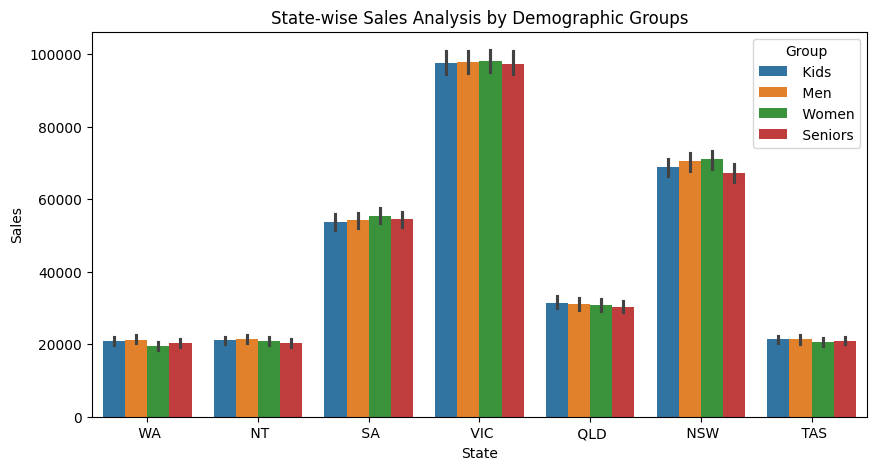

In [35]:
plt.figure(figsize=(10, 5))
sns.barplot(x='State', y='Sales', hue='Group', data=data)
plt.title('State-wise Sales Analysis by Demographic Groups')
plt.ylabel('Sales')
plt.xlabel('State')
plt.legend(title='Group')
plt.show()

#### o	Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.

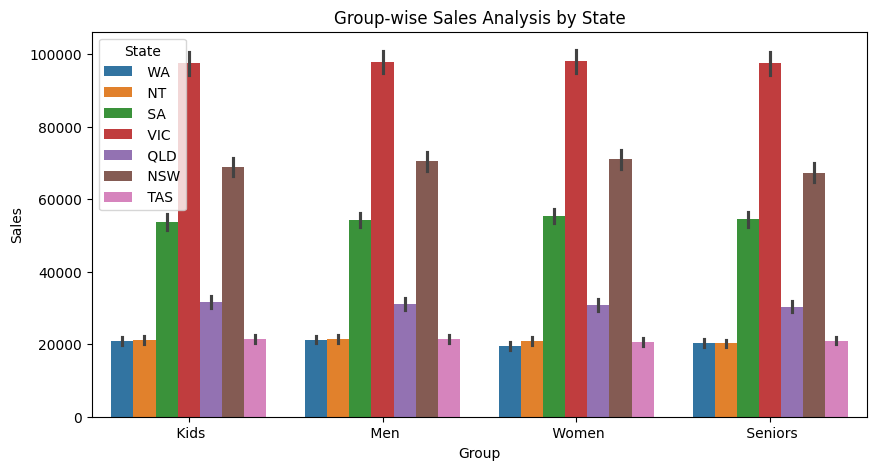

In [36]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Group', y='Sales', hue='State', data=data)
plt.title('Group-wise Sales Analysis by State')
plt.ylabel('Sales')
plt.xlabel('Group')
plt.legend(title='State')
plt.show()

#### o	Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.

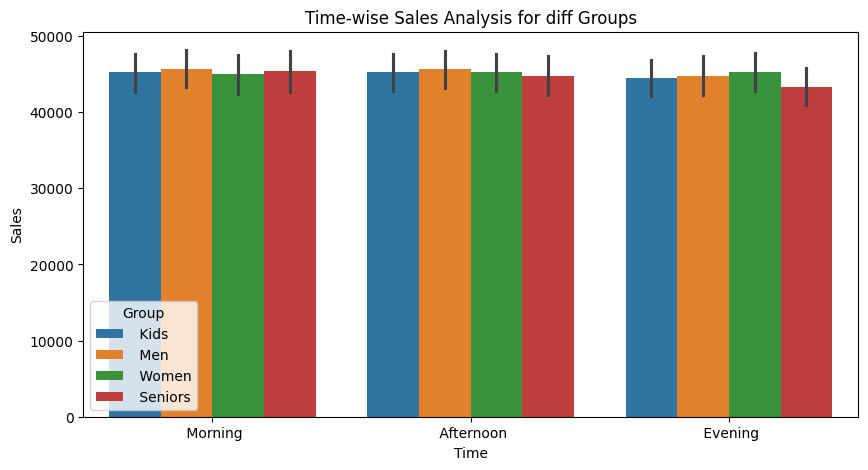

In [39]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Time', y='Sales', hue='Group', data=data)
plt.title('Time-wise Sales Analysis for diff Groups')
plt.ylabel('Sales')
plt.xlabel('Time')
plt.legend(title='Group')
plt.show()

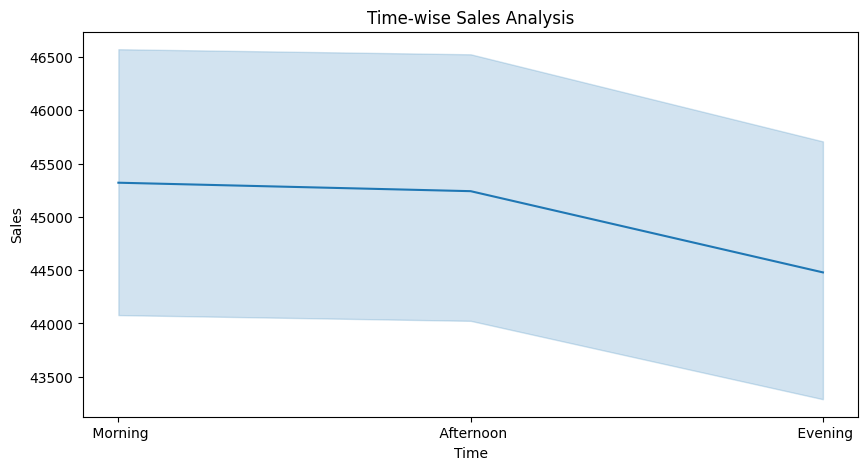

In [40]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Time', y='Sales', data=data)
plt.title('Time-wise Sales Analysis')
plt.ylabel('Sales')
plt.xlabel('Time')
plt.show() 

#### Time wise Analysis shows the sales is almost the same in the modern and afternoon but drop significantly towards the evening.

#### b.	Ensure the visualization is clear and accessible for effective decision-making by the head of sales and marketing (S&M).The dashboard must contain daily, weekly, monthly, and quarterly charts.


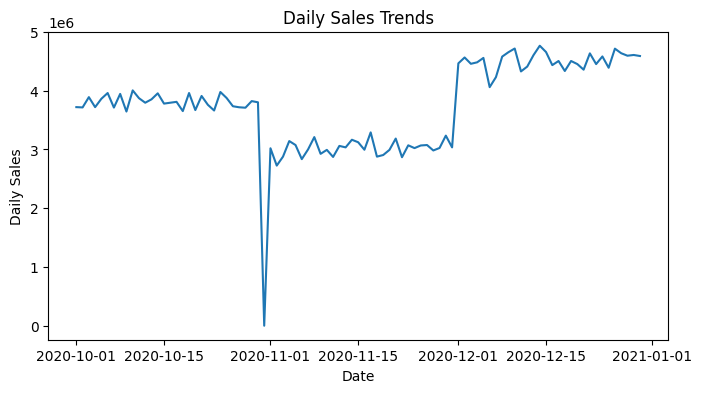

In [ ]:
## Developing Charts for daily,weekly,monthly and quarterly trends

## Code to plot the daily trends
data.set_index('Date', inplace=True)
plt.figure(figsize=(8, 4))
## Using Resampling to get daily sums
daily_sales = data['Sales'].resample('D').sum()
sns.lineplot(data=daily_sales)
plt.title('Daily Sales Trends')
plt.ylabel('Daily Sales')
plt.xlabel('Date')
plt.show()

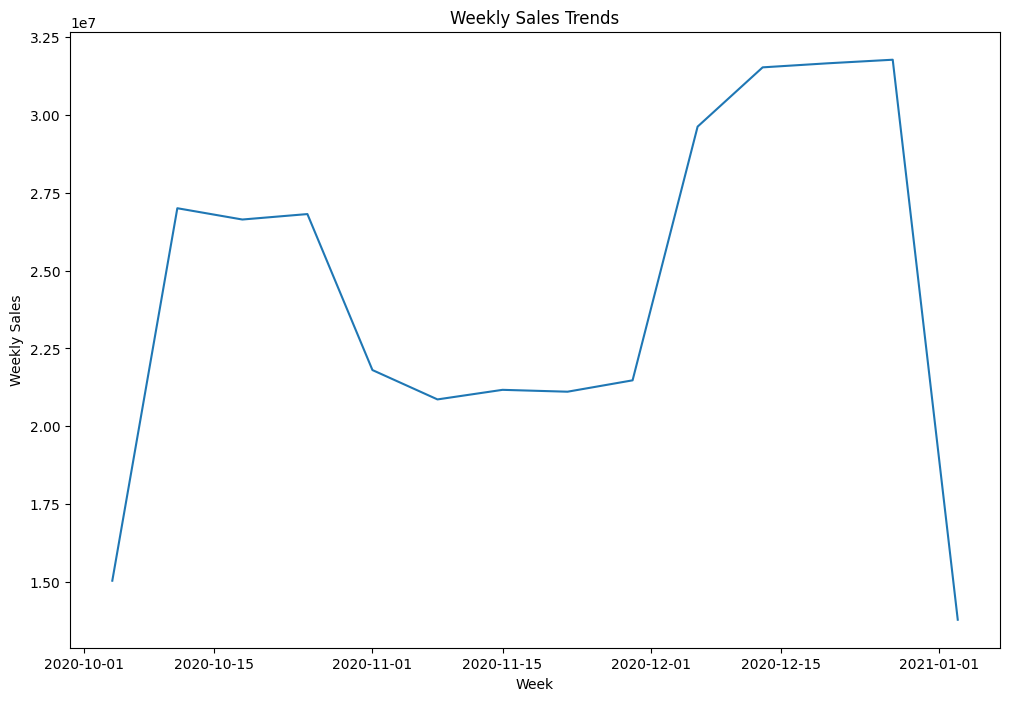

In [48]:
### Code to plot the weekly trends
plt.figure(figsize=(12,8))
weekly_trend=data['Sales'].resample('W').sum()
sns.lineplot(data=weekly_trend)
plt.title('Weekly Sales Trends')
plt.ylabel('Weekly Sales')
plt.xlabel('Week')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_15824\356040519.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend=data['Sales'].resample('M').sum()


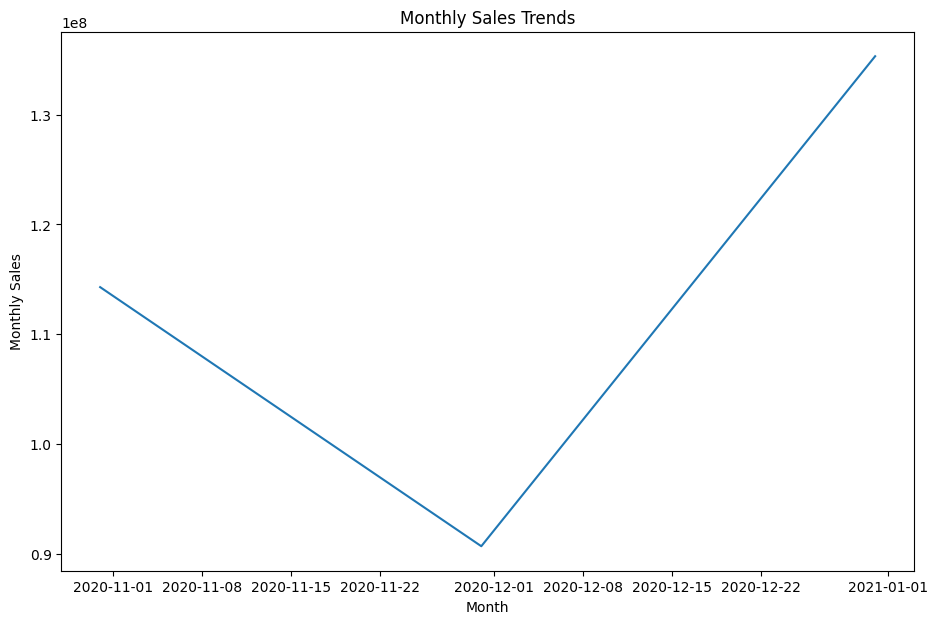

In [56]:
### Code to plot the monthly trends
plt.figure(figsize=(11,7))
monthly_trend=data['Sales'].resample('M').sum()
sns.lineplot(data=monthly_sales['Sales'])
plt.title('Monthly Sales Trends')
plt.ylabel('Monthly Sales')
plt.xlabel('Month')
plt.show()

In [59]:
m_trend=pd.DataFrame(monthly_trend)

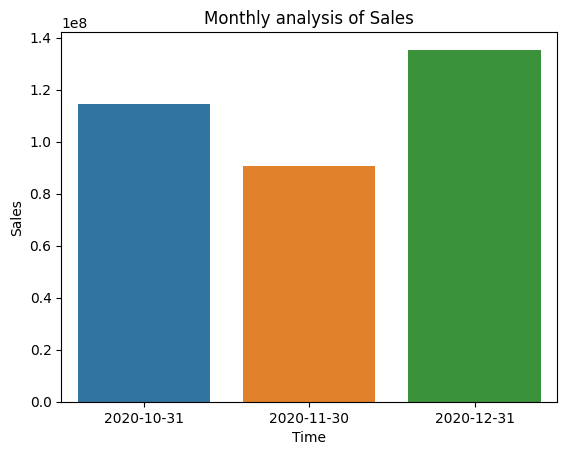

In [62]:
sns.barplot(x='Date', y='Sales', hue='Date',data=m_trend)
plt.title('Monthly analysis of Sales')
plt.ylabel('Sales')
plt.xlabel('Time')
plt.show()

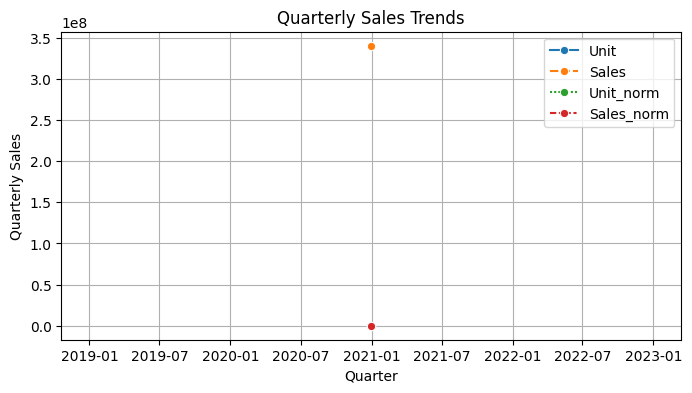

In [63]:
### Quarterly trend is not applicable since  we are having just one quarter of data. That one quarter is just one point
plt.figure(figsize=(8, 4))
sns.lineplot(data=quarterly_sales, marker='o')  # Adding marker='o' to show the point clearly
plt.title('Quarterly Sales Trends')
plt.ylabel('Quarterly Sales')
plt.xlabel('Quarter')
plt.grid(True)
plt.show()

#### c.	Include your recommendation and indicate why you are choosing the recommended visualization package.
#### Both matplotlib and seaborn are good visualization packages. Seaborn is suited to statistical analysis, and provides better visualization with easy to understand code & higher ease of use.